In [1]:
import warnings
import ast
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

warnings.filterwarnings("ignore")

In [2]:
PROJECT_NAME = "ignite"
EXP_ID = "apch"
MODEL_HISTORY = 15
TOTAL_WINDOWS = 56
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
# load baseline evaluation results
base_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_base_eval.csv")
base_eval_df["model"] = "base"
base_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,ignite,0,1,0.357143,0.416667,0.384615,0.792775,0.629857,0.298418,0.952128,base
1,ignite,0,2,0.157895,0.157895,0.157895,0.640884,0.379391,0.164947,0.911602,base
2,ignite,0,3,0.466667,0.350000,0.400000,0.827917,0.578312,0.457070,0.955556,base
3,ignite,0,4,0.428571,0.150000,0.222222,0.774444,0.382971,0.328194,0.977778,base
4,ignite,0,5,0.333333,0.272727,0.300000,0.724868,0.513877,0.281684,0.968254,base


In [4]:
# load ecoselekt evaluation results
selekt_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selekt_eval.csv")
selekt_eval_df["model"] = "ecoselekt"
selekt_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,ignite,15,16,0.150000,0.075000,0.100000,0.497812,0.258904,0.195018,0.893750,ecoselekt
1,ignite,15,17,0.066667,0.037037,0.047619,0.585528,0.184499,0.163861,0.919075,ecoselekt
2,ignite,15,18,0.166667,0.172414,0.169492,0.509679,0.383676,0.191001,0.853801,ecoselekt
3,ignite,15,19,0.218750,0.189189,0.202899,0.533742,0.400215,0.206011,0.846626,ecoselekt
4,ignite,15,20,0.136364,0.083333,0.103448,0.543530,0.271439,0.190665,0.884146,ecoselekt


In [5]:
# load best select evaluation results
best_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_eval.csv")
best_eval_df["model"] = "best"
best_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,ignite,15,16,1.0,0.500000,0.666667,0.987656,0.707107,0.956260,1.0,best
1,ignite,15,17,1.0,0.629630,0.772727,0.992507,0.793492,0.959396,1.0,best
2,ignite,15,18,1.0,0.724138,0.840000,0.990724,0.850963,0.970005,1.0,best
3,ignite,15,19,1.0,0.540541,0.701754,0.993119,0.735215,0.973302,1.0,best
4,ignite,15,20,1.0,0.527778,0.690909,0.970613,0.726483,0.914939,1.0,best


(1640, 11)


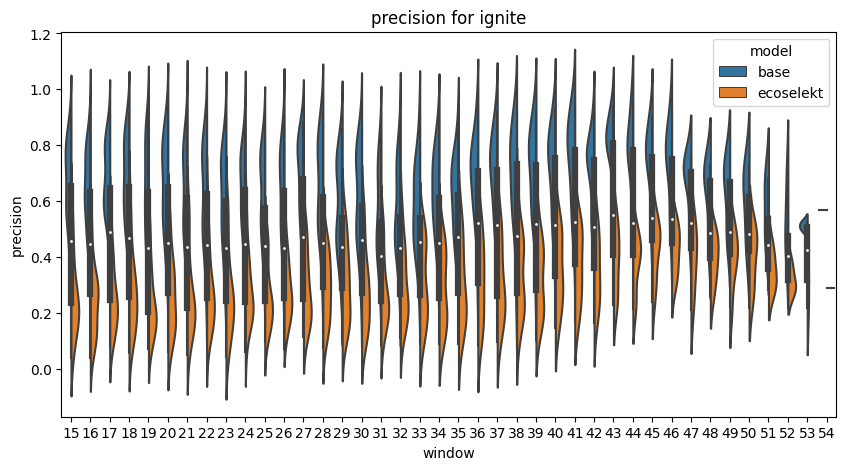

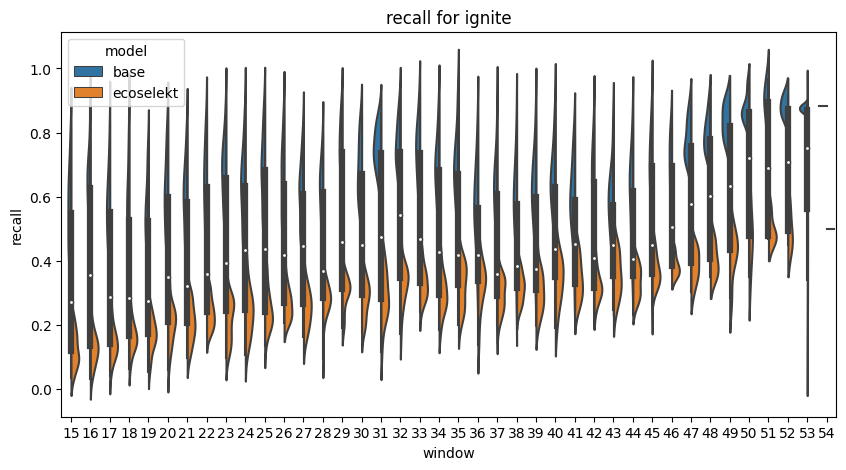

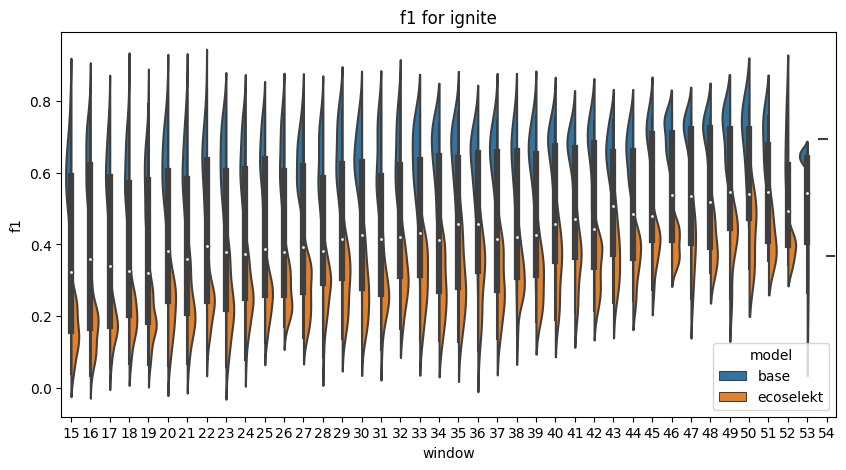

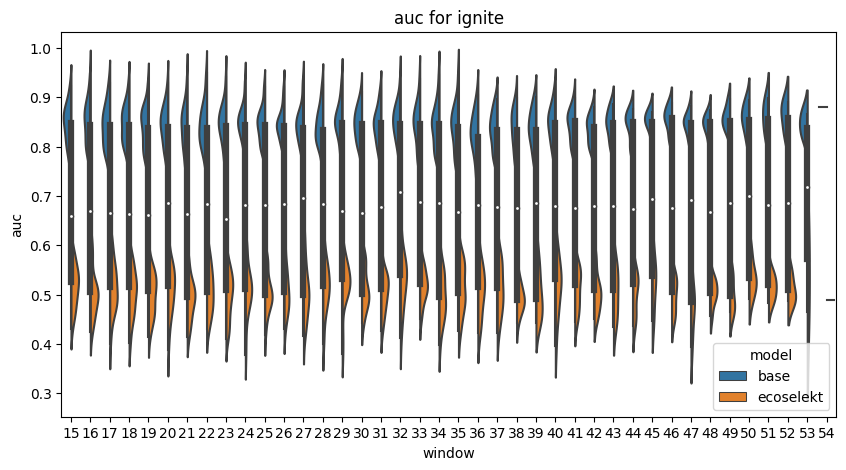

In [6]:
# concat base and ecoselekt evaluation dataframes keeping only common `window` and `test_split` then plot violin plots for each metric
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
print(eval_df.shape)

# plot violin plots for each metric
for metric in ["precision", "recall", "f1", "auc"]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x="window", y=metric, data=eval_df, hue="model", split=True)
    plt.title(f"{metric} for {PROJECT_NAME}")
    plt.show()


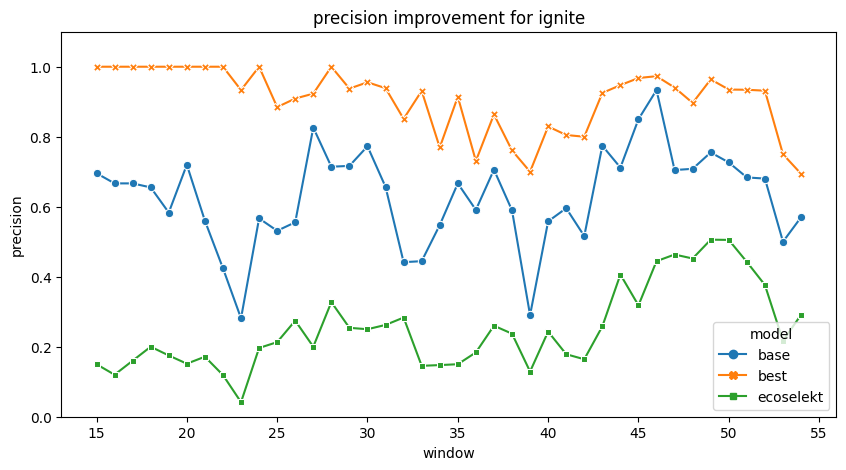

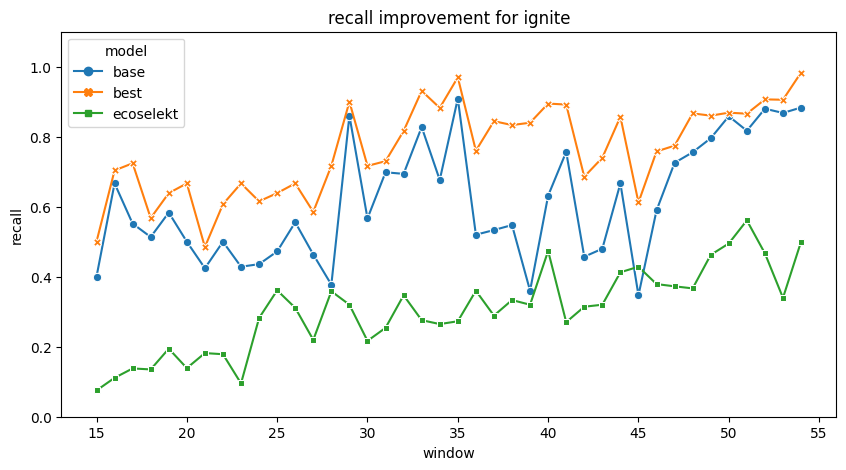

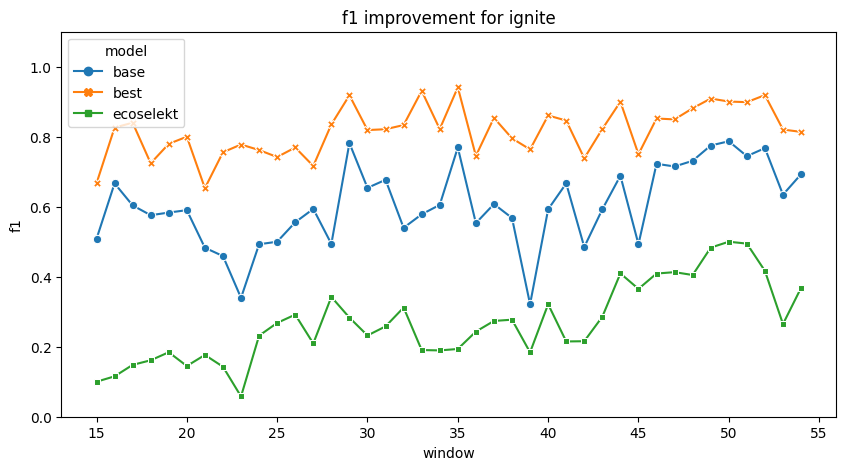

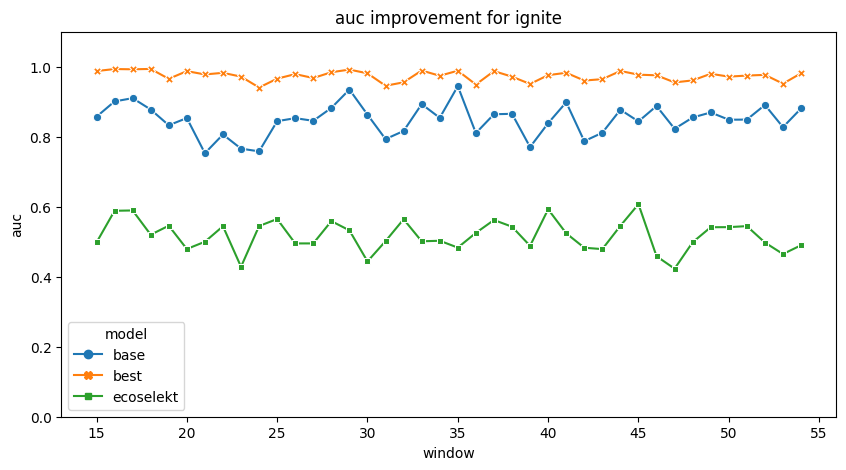

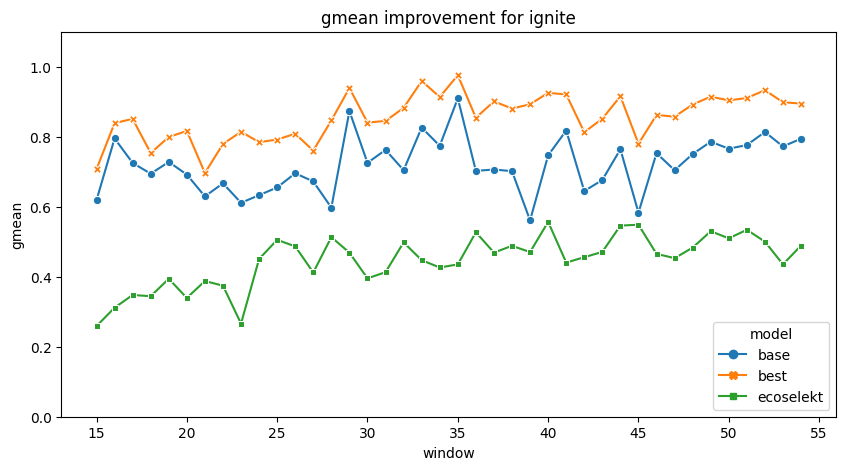

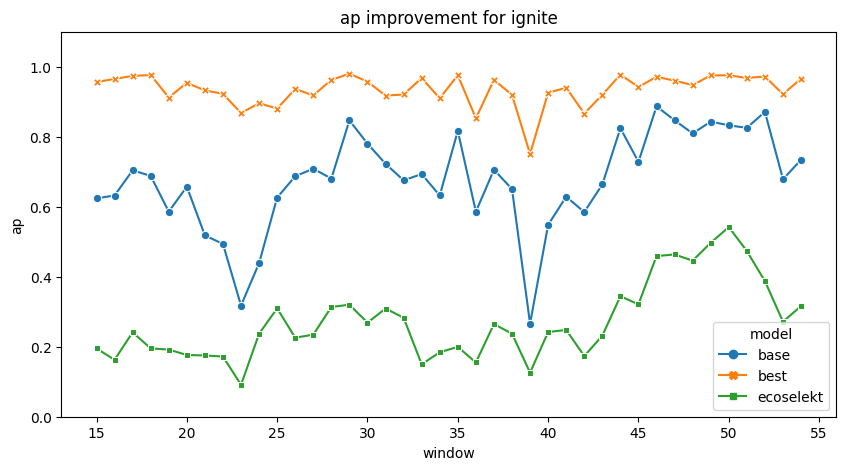

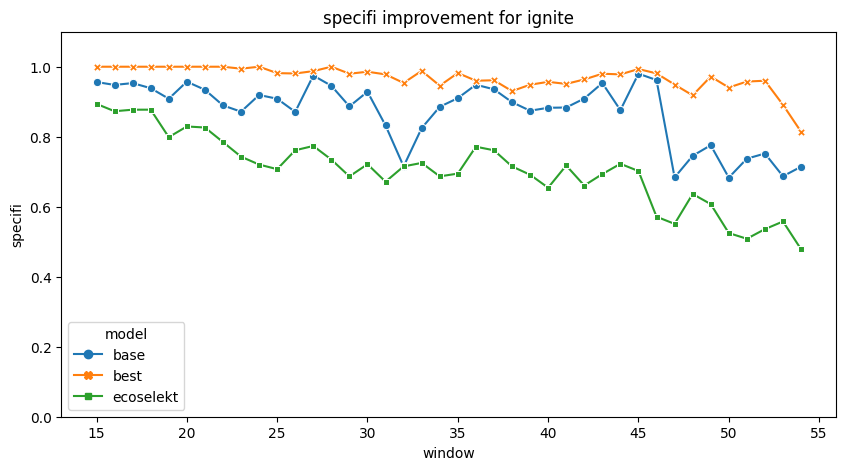

In [7]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

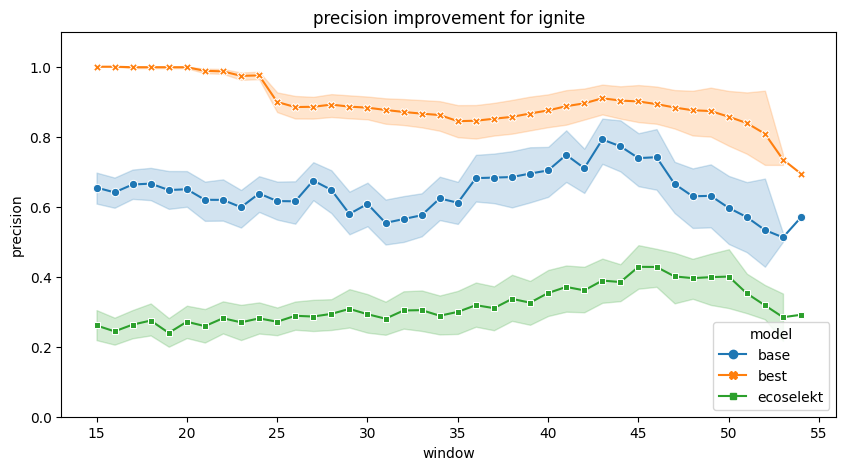

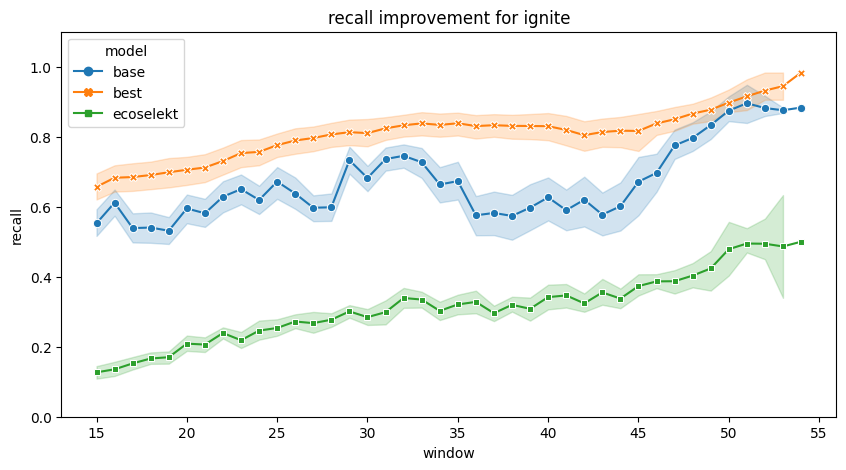

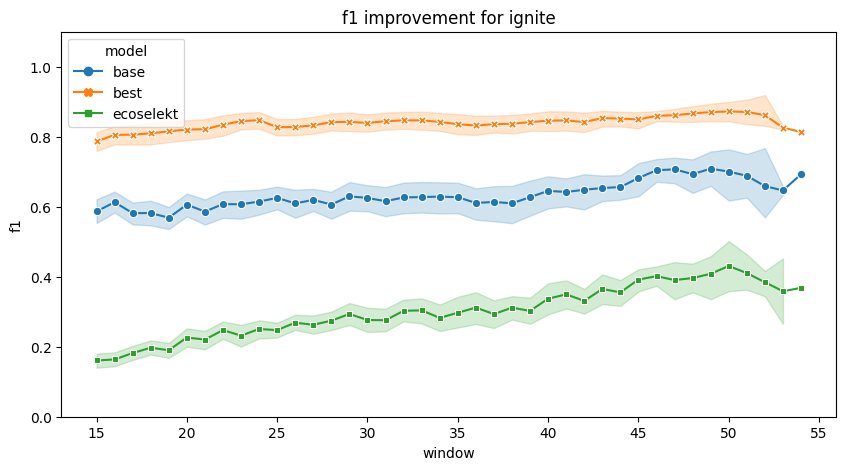

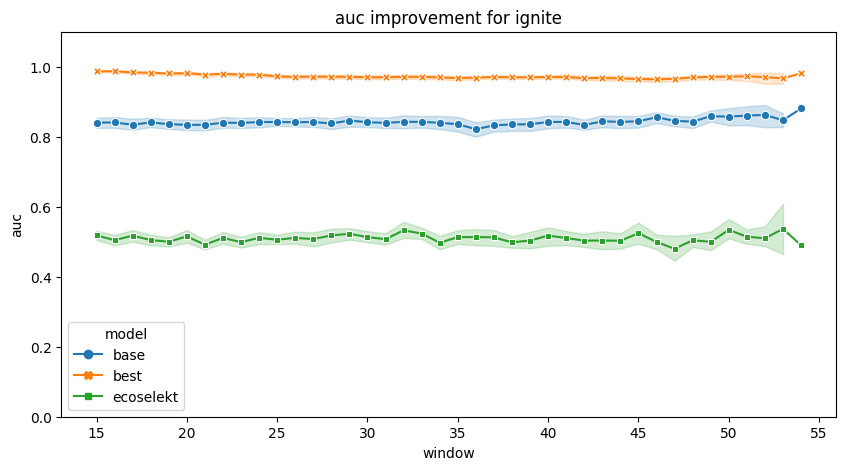

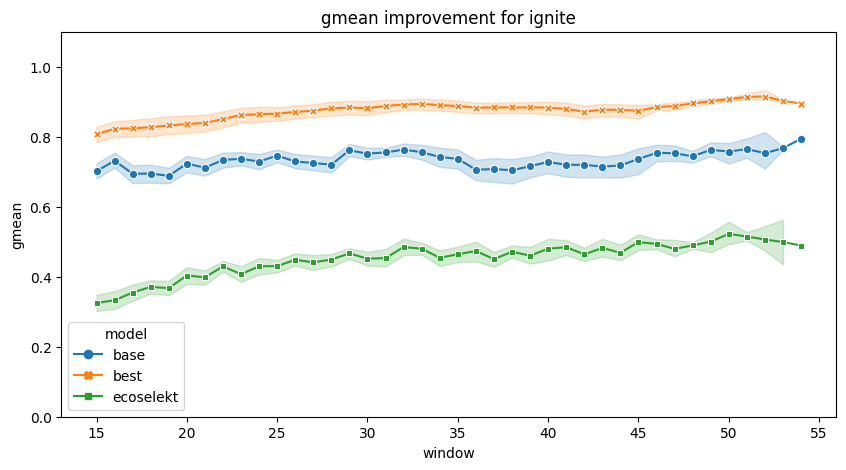

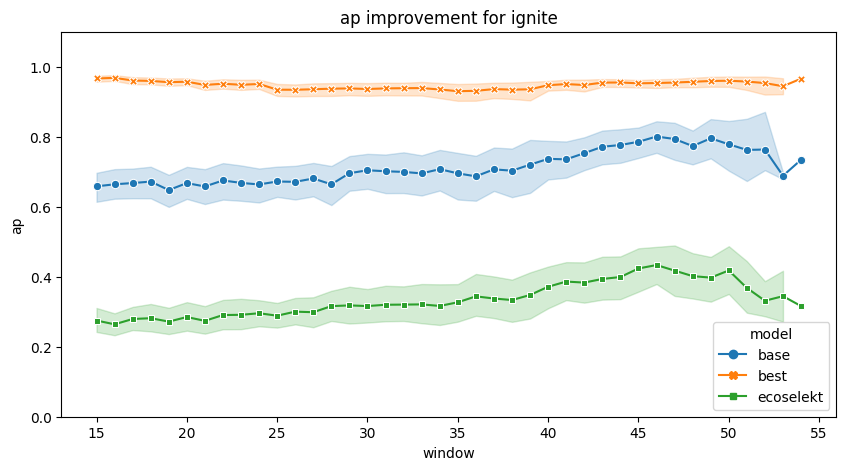

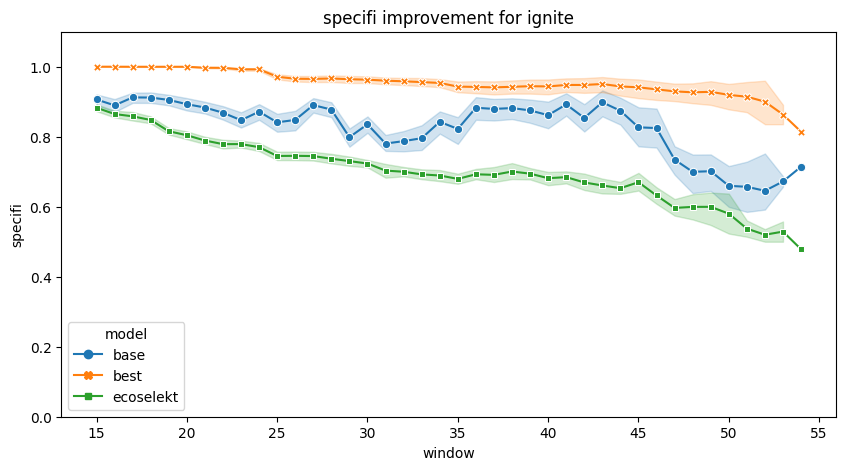

In [8]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

In [9]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["auc"], eval_df[eval_df["model"] == "base"]["auc"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 1.8189894035458565e-12
Wilcoxon test significance: True


In [10]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["recall"], eval_df[eval_df["model"] == "base"]["recall"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 9.094947017729282e-12
Wilcoxon test significance: True


In [11]:
bestmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_model_per_test_split.csv")
bestmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(bestmodel_df.shape)
bestmodel_df.head()

(164000, 4)


,commit_id,window,test_split,model_version
0,0135a4cb089faa828c9797b80ac0570fffffc4ad,15,16,0
1,124856ae28d4c62e4867449299cfc4fad74ab60d,15,16,2
2,f6f6419975556b6baf059add103b432f17d33941,15,16,13
3,25f55de1ec650f7a342693b9f4888f3785542689,15,16,1
4,422ffb140b4f423c953860c44b91d74db74ebfbd,15,16,3


In [12]:
selektmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selected_model_per_test_split.csv")
selektmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(selektmodel_df.shape)
selektmodel_df.head()

(164000, 4)


,commit_id,window,test_split,model_version
0,0135a4cb089faa828c9797b80ac0570fffffc4ad,15,16,13
1,01689b1d576e02179c34eb1126b41b341c40eb52,15,16,15
2,03890cc6fcd0f3c601d89ef97c16607a5dc61329,15,16,15
3,03c899224e19af3597652a64ea1a4c0075c8e74c,15,16,2
4,04927740bccae57ba6e9c9b440c18b8a191f9fa4,15,16,2


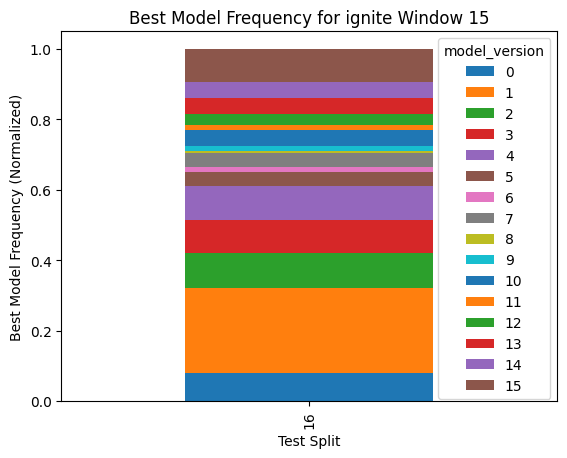

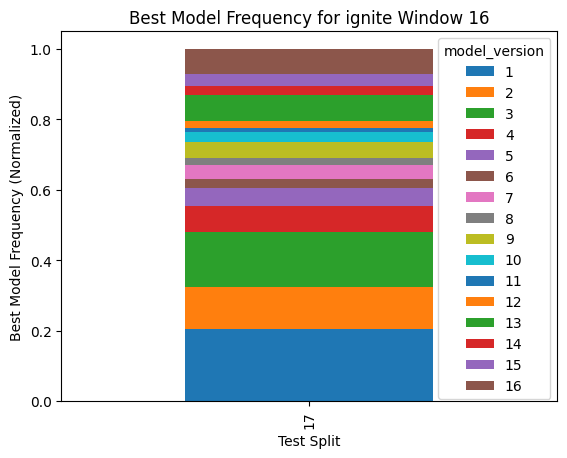

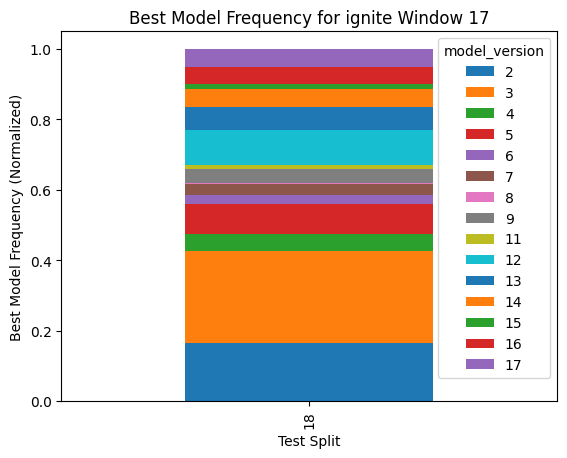

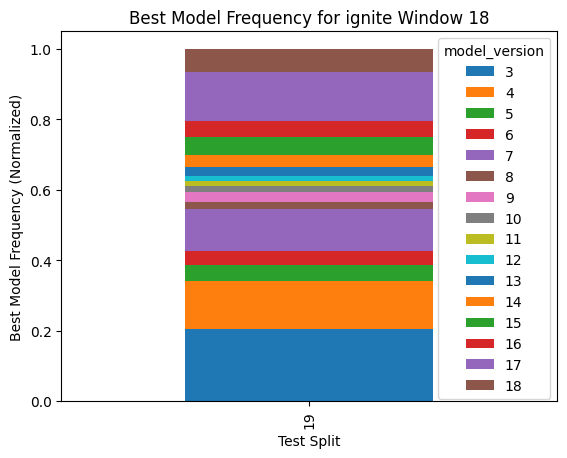

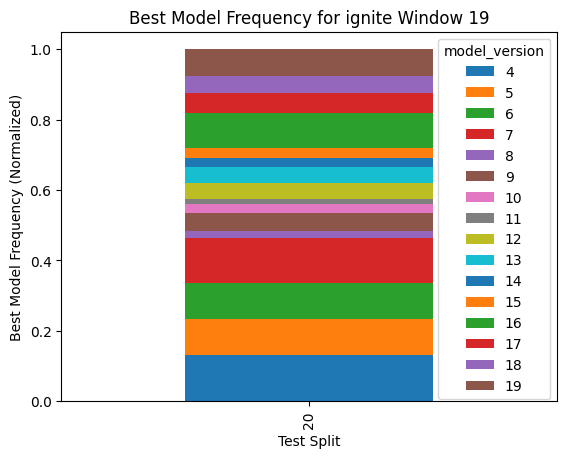

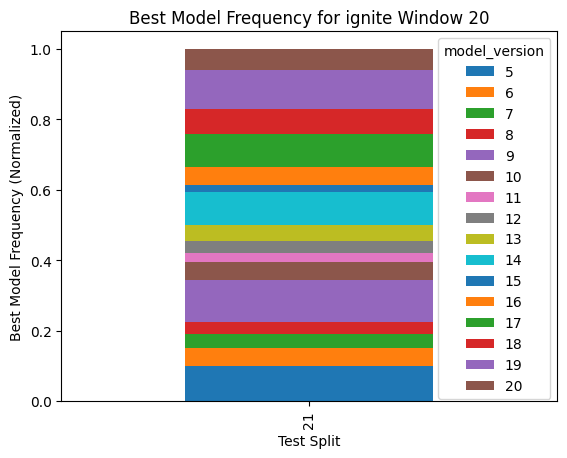

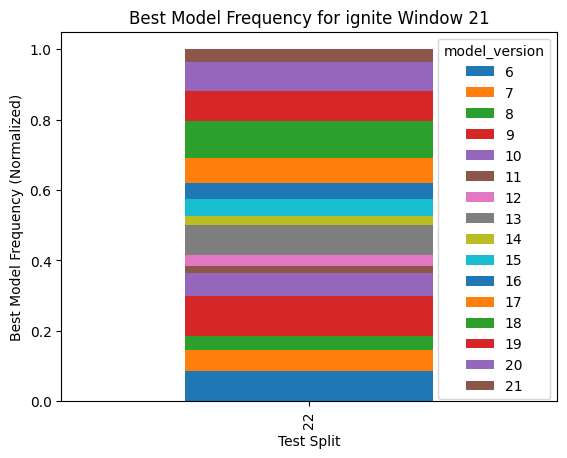

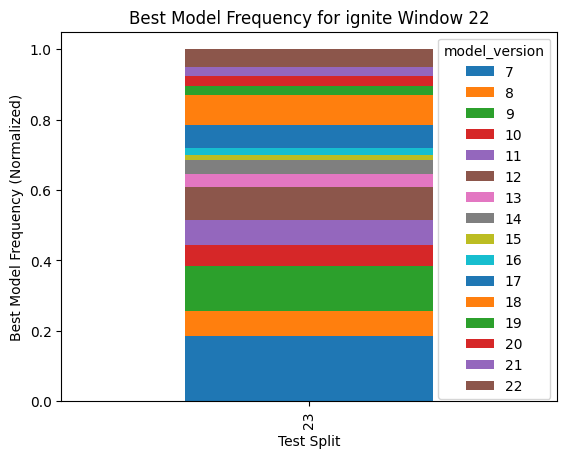

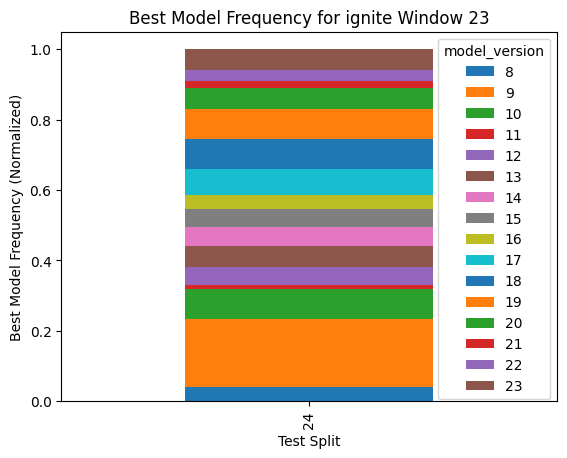

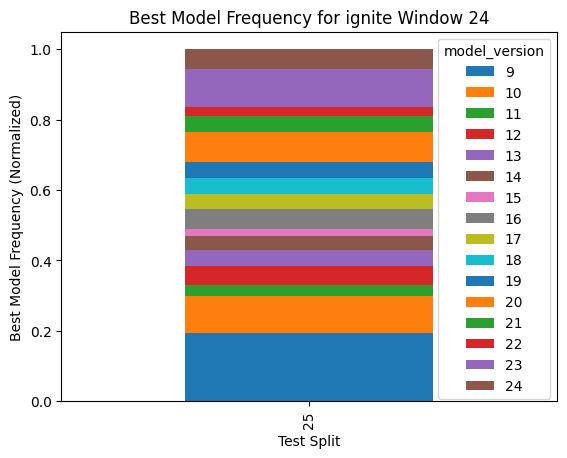

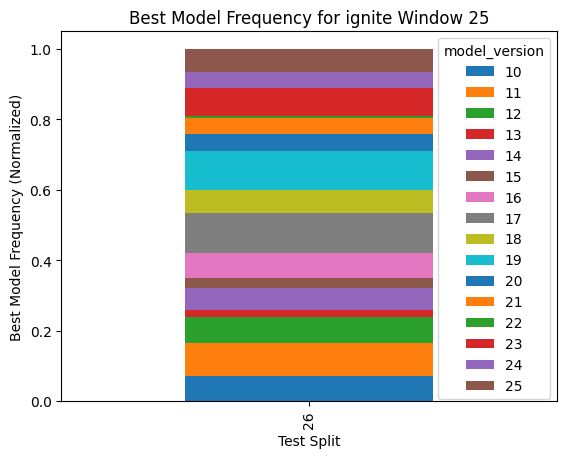

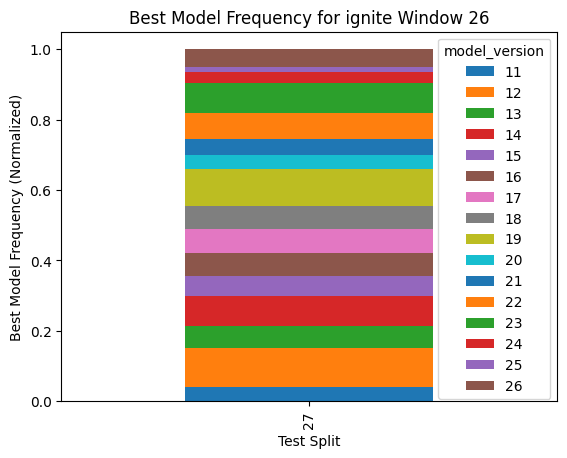

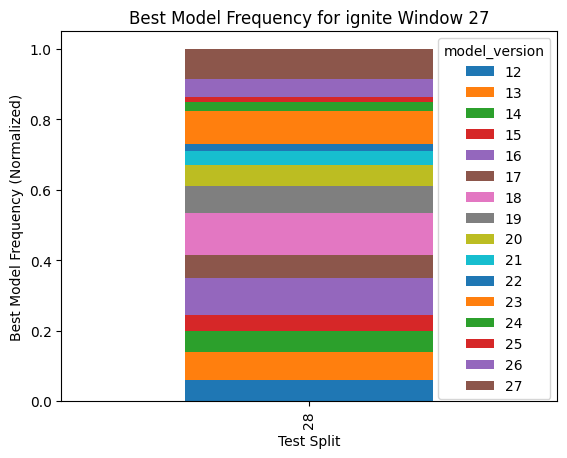

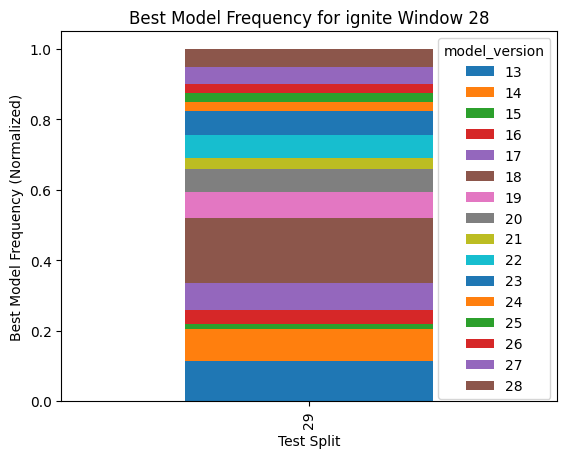

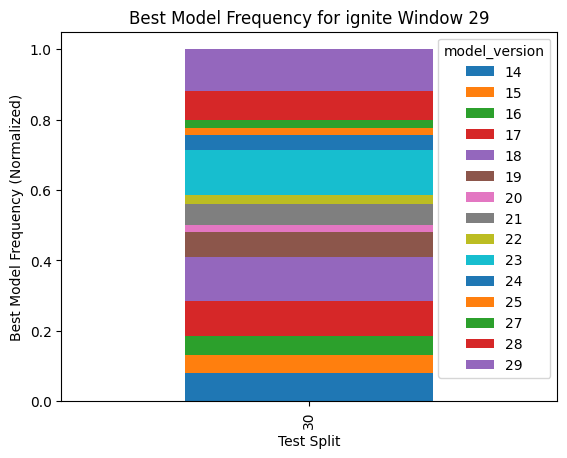

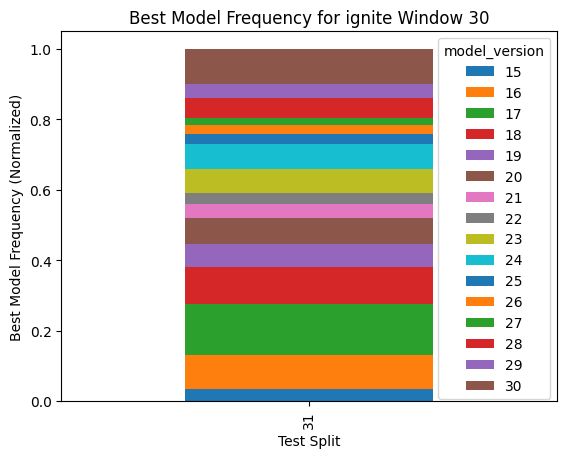

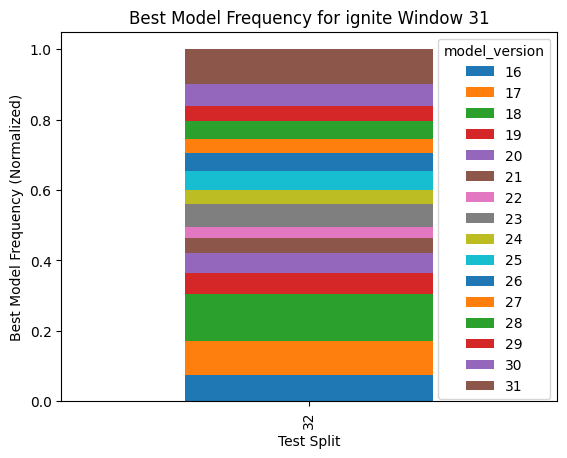

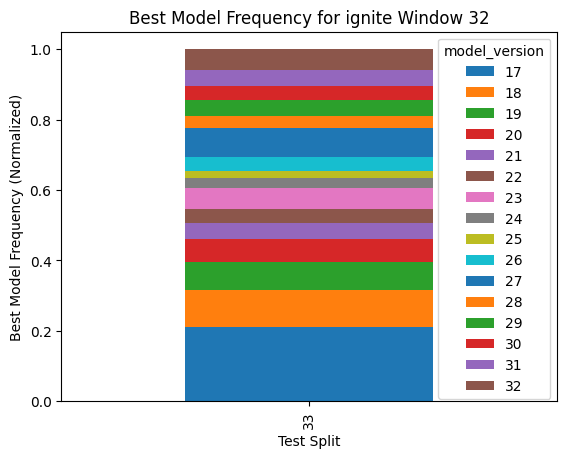

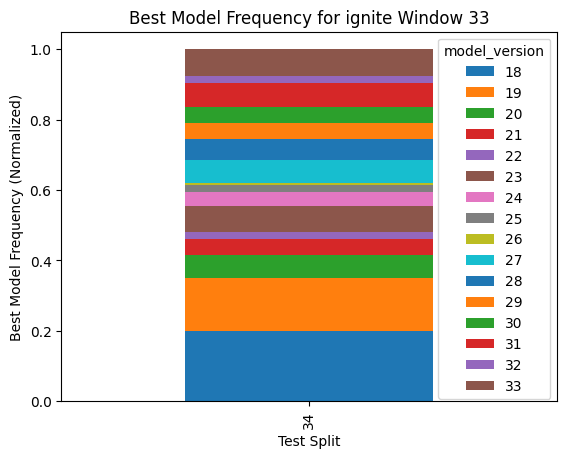

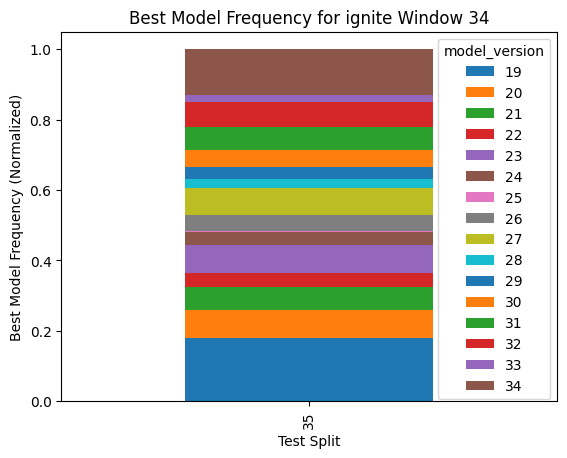

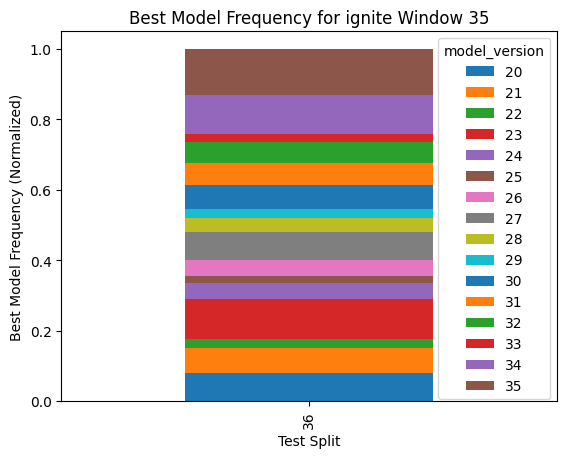

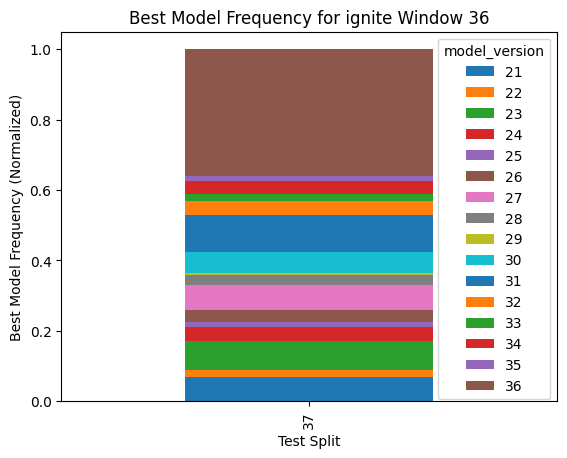

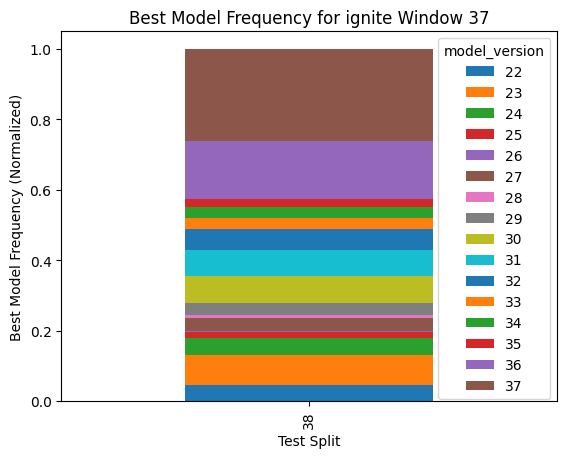

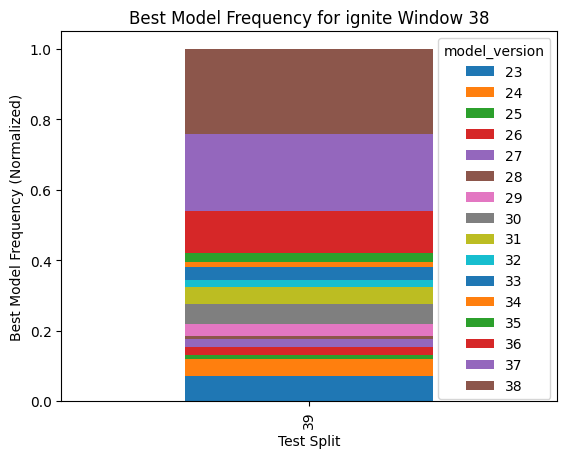

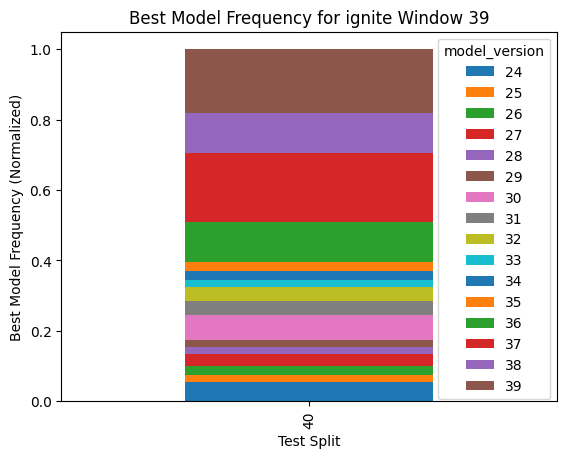

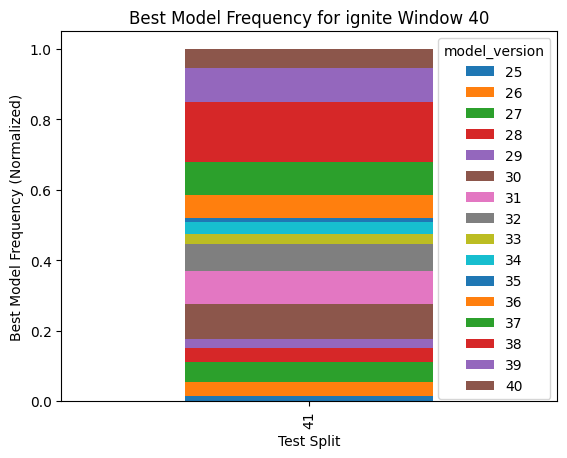

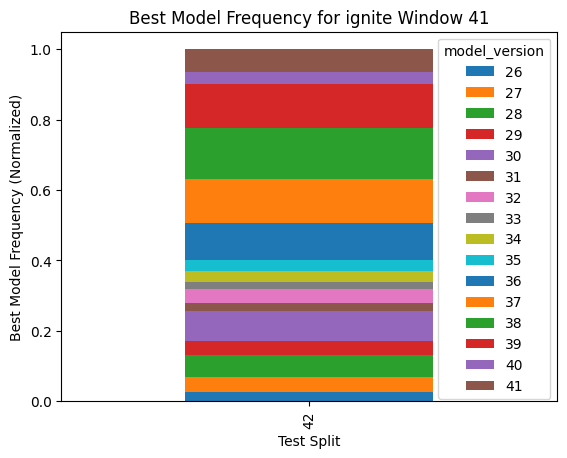

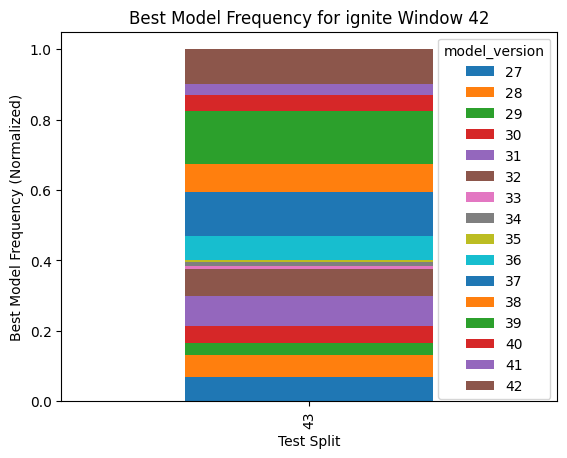

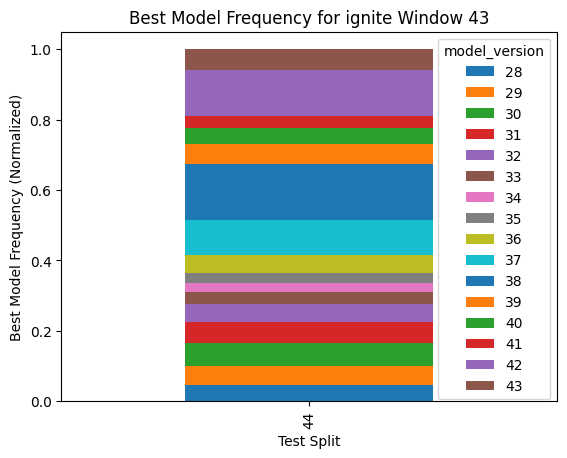

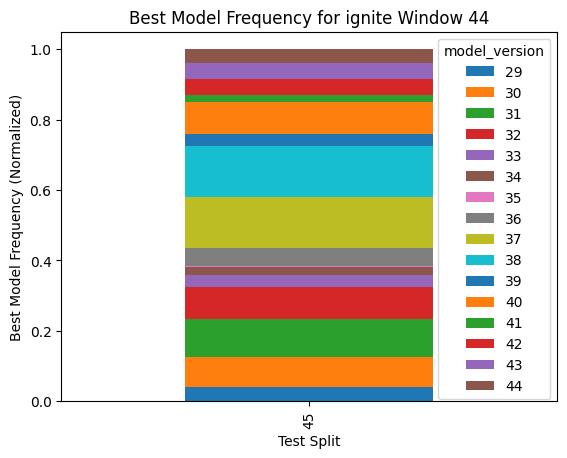

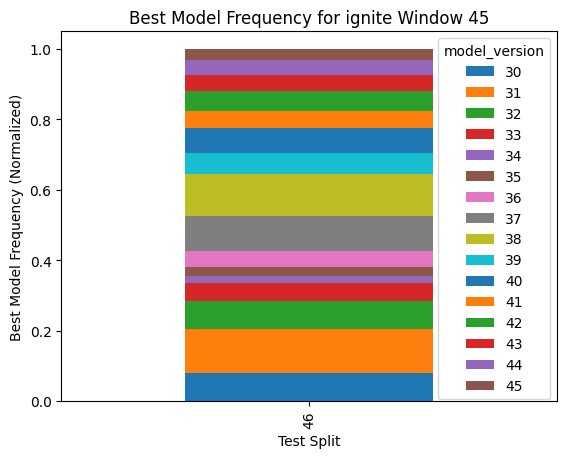

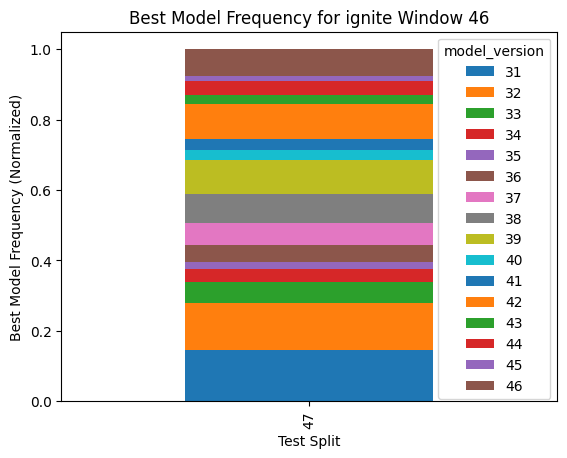

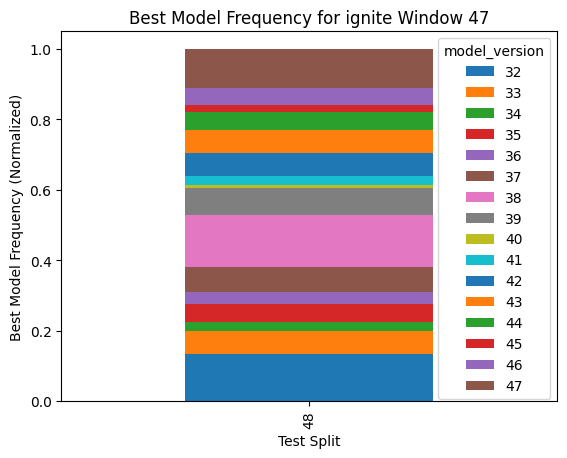

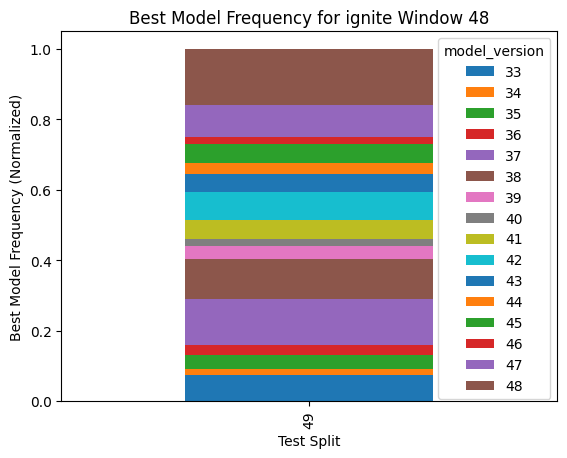

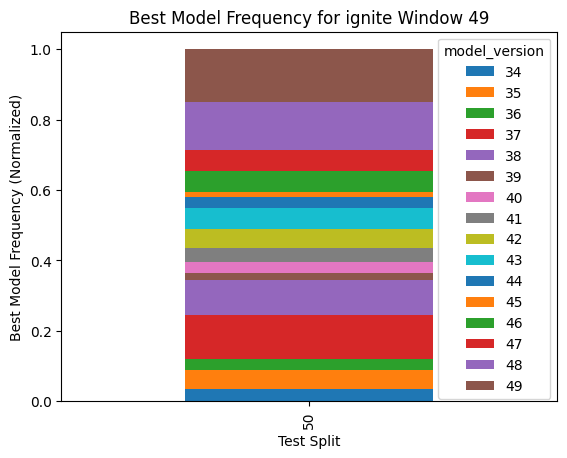

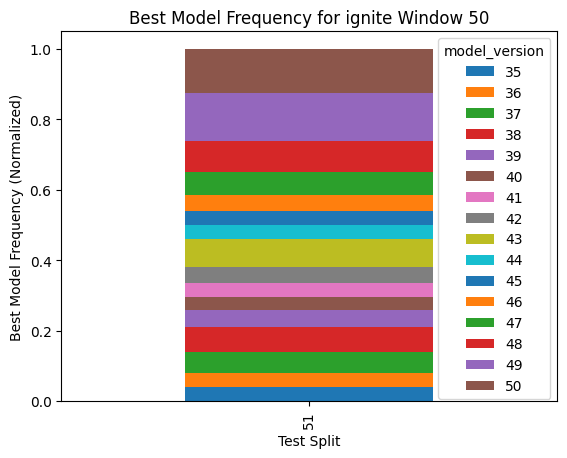

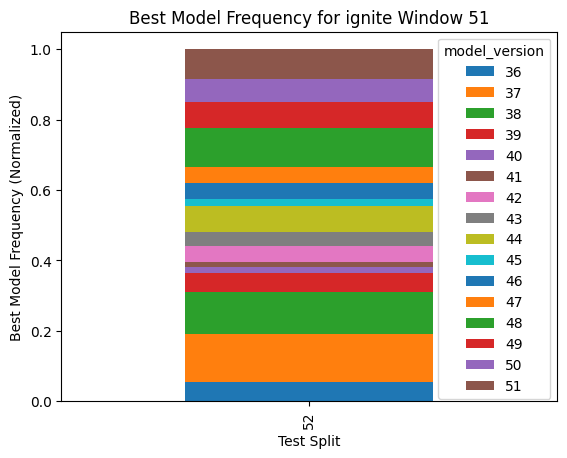

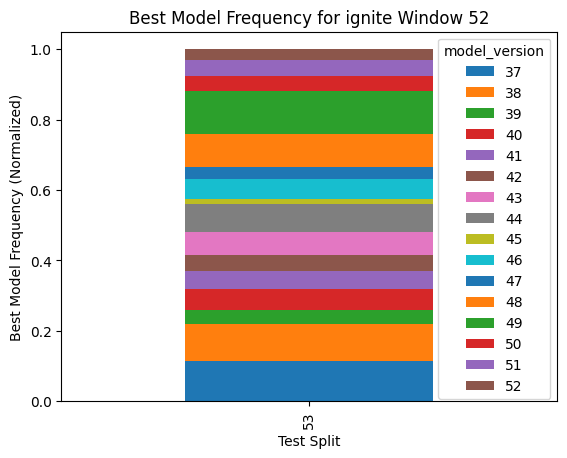

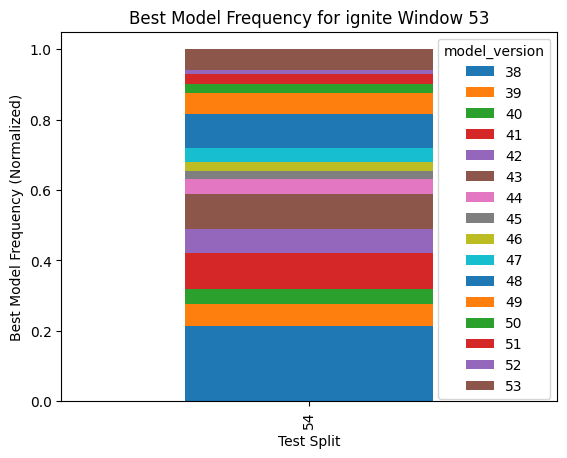

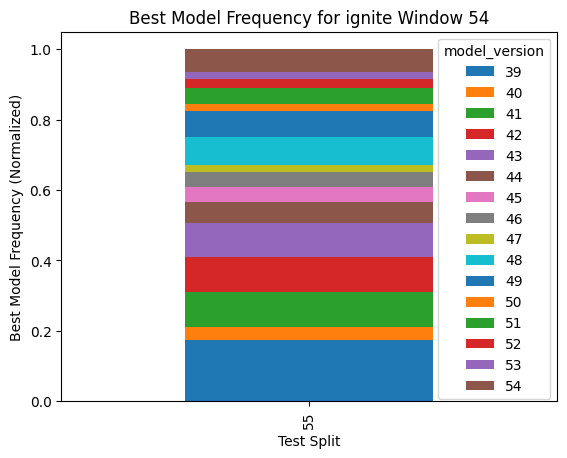

In [13]:
for i in range(MODEL_HISTORY,TOTAL_WINDOWS - 1):
    temp_bestmodel_df = bestmodel_df[bestmodel_df["window"] == i]
    temp_bestmodel_df = temp_bestmodel_df[temp_bestmodel_df["test_split"] == i + 1]

    # best model
    model_frequency_by_test_split = temp_bestmodel_df.groupby('test_split')['model_version'].value_counts().unstack().fillna(0)
    normalized_model_frequency_by_test_split = model_frequency_by_test_split.div(model_frequency_by_test_split.sum(axis=1), axis=0)
    p = normalized_model_frequency_by_test_split.plot(kind='bar', stacked=True)
    p.set_xlabel("Test Split")
    p.set_ylabel("Best Model Frequency (Normalized)")
    p.set_title(f"Best Model Frequency for {PROJECT_NAME} Window {i}")